## AI빅데이터프로그래밍 기말고사

- **DATA_01.csv 파일을 활용하여 다음 문항에 적절한 코드 및 답안을 작성하여 html파일을 제출하세요.**
* **데이터 설명**
  * 본 데이터는 A대학 도서관에서 제공하는 온라인 DB에 대한 사용자별 이용기록(Transaction)입니다.
  * user_id : 사용자ID
  * region : 지역코드
  * college : 단과대학코드
  * major : 전공코드
  * social_position : 직급코드
  * month : 이용월
  * weekday : 이용요일(1:일요일, 2:월요일, 3:화요일, 4:수요일, 5:목요일, 6:금요일, 7:토요일)
  * hour : 이용시각(24H)
  * DB : 이용 온라인 DB

#### 0.0. 필요한 패키지를 로딩하세요

In [418]:
import pandas as pd
import numpy as np

### 1. 데이터 로딩 및 문제 파악하기

#### 1.1. 데이터를 로딩하고 처음 5개의 레코드를 출력하세요.

In [526]:
data = pd.read_csv('data/DATA_01.csv')
data.head()

,user_id,region,college,major,social_position,month,weekday,hour,DB
0,U0002,R01,C0002,M09,S005,3.0,3,21,DB048
1,U0003,R01,C0003,M01,S001,3.0,2,12,DB048
2,U0003,R01,C0003,M01,S001,3.0,2,13,DB048
3,U0006,R01,C0001,M11,S005,3.0,2,14,DB055
4,U0005,R01,C0001,M08,S005,3.0,2,14,DB044


#### 1.2. 변수별 데이터 타입, 결측치 제외 레코드 수 등을 알아볼 수는 코드를 제시하고 문제점이 있을 경우 서술하세요.

In [457]:
### 변수별 데이터 타입, 결측치 제외 레코드 수 등을 알아볼 수는 코드
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117729 entries, 0 to 117728
Data columns (total 9 columns):
user_id            117729 non-null object
region             117729 non-null object
college            117729 non-null object
major              115893 non-null object
social_position    117729 non-null object
month              116186 non-null float64
weekday            117729 non-null int64
hour               117729 non-null int64
DB                 117729 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 8.1+ MB


In [528]:
#### [추가] 변수별 데이타 타입 및 결측치 레코드 수 확인하는 코드
pd.DataFrame({'전체 레코드 수': len(data), '결측치 제외 레코드 수': data.count(), '결측치 레코드 수': data.isnull().sum()}).T

,user_id,region,college,major,social_position,month,weekday,hour,DB
전체 레코드 수,117729,117729,117729,117729,117729,117729,117729,117729,117729
결측치 제외 레코드 수,117729,117729,117729,115893,117729,116186,117729,117729,117729
결측치 레코드 수,0,0,0,1836,0,1543,0,0,0


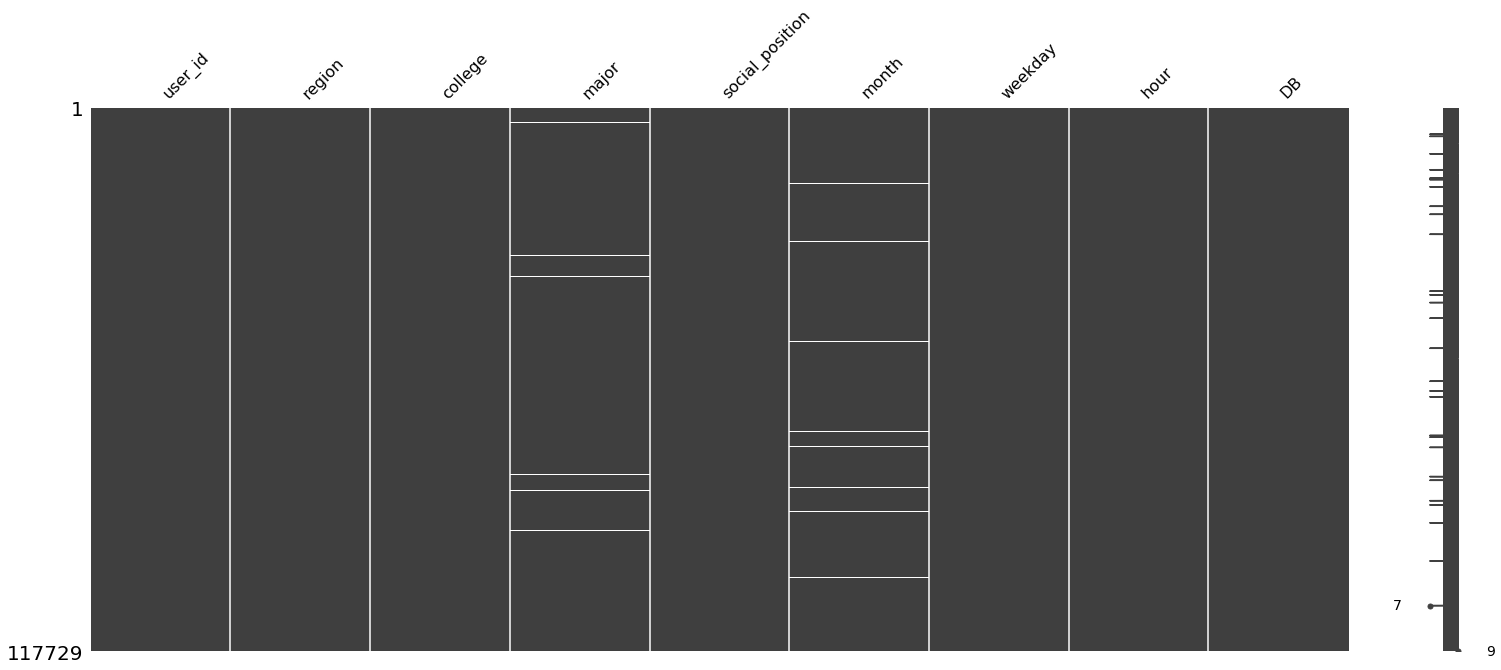

In [529]:
### [추가] 결측치를 확인하는 그래프 출력 코드
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(data)
plt.show()

In [735]:
### [추가] 값 이상치 확인 = user_id 변수에 따라 region, college, major, social_position 중 종속되지 않는 변수 확인 코드

#data.groupby(['user_id', 'region']).count()
data.groupby(['user_id', 'college']).count()
#data.groupby(['user_id', 'major']).count()
#data.groupby(['user_id', 'social_position']).count()

region  major  social_position  month  weekday  hour   DB
user_id college                                                           
U0001   C0001        18     18               18     17       18    18   18
U0002   C0002        10     10               10     10       10    10   10
U0003   C0003       162    158              162    160      162   162  162
        C0036         2      2                2      2        2     2    2
U0004   C0001        89     88               89     89       89    89   89
U0005   C0001       233    227              233    229      233   233  233
        C0036         2      2                2      2        2     2    2
U0006   C0001        30     30               30     30       30    30   30
U0007   C0001        10      9               10     10       10    10   10
U0008   C0001       107    105              107    105      107   107  107
U0009   C0001       270    264              270    263      270   270  270
        C0036         1      1                1      1        1     1    1
U0010   C0002        47     45               47     45       47    47   47
U0011   C0001       171    169              171    164      171   171  171
        C0036         2      2                2      2        2     2    2
U0012   C0004         4      4                4      4        4     4    4
U0013   C0005        52     52               52     51       52    52   52
U0014   C0001       267    262              267    266      267   267  267
U0015   C0001       217    214              217    211      217   217  217
        C0036         1      1                1      1        1     1    1
U0016   C0001        32     32               32     32       32    32   32
U0017   C0001         1      1                1      1        1     1    1
U0018   C0006        11     11               11     11       11    11   11
U0019   C0007        22     22               22     22       22    22   22
        C0036         1      1                1      1        1     1    1
U0020   C0001        25     25               25     24       25    25   25
        C0036         1      1                1      1        1     1    1
U0021   C0003         9      9                9      9        9     9    9
U0022   C0001        73     71               73     73       73    73   73
        C0036         1      1                1      1        1     1    1
...                 ...    ...              ...    ...      ...   ...  ...
U5920   C0025         2      2                2      2        2     2    2
U5921   C0001         2      2                2      2        2     2    2
U5922   C0023         8      8                8      8        8     8    8
U5923   C0006         5      5                5      5        5     5    5
U5924   C0001         1      1                1      1        1     1    1
U5925   C0006         5      5                5      5        5     5    5
U5926   C0013         2      2                2      2        2     2    2
U5927   C0001         2      2                2      2        2     2    2
U5928   C0008         1      1                1      0        1     1    1
U5931   C0002         3      3                3      3        3     3    3
U5932   C0005         2      2                2      2        2     2    2
U5933   C0010         1      1                1      1        1     1    1
U5934   C0047         2      2                2      2        2     2    2
U5935   C0008         5      5                5      5        5     5    5
U5937   C0006         1      1                1      1        1     1    1
U5938   C0020         1      1                1      1        1     1    1
U5939   C0031         1      1                1      1        1     1    1
U5940   C0044         1      1                1      1        1     1    1
U5941   C0028         9      9                9      9        9     9    9
U5943   C0005         2      2                2      2        2     2    2
U5944   C0048         6      6            

- 문제점 
  1. 데이타 레코드는 117729 이나, major 변수에 1,836개 및 month 변수에 1,543개의 결측치가 존재합니다.
  2. month 변수의 경우 결치측에 의하여 float 형이 되어 과도한 메모리 점유가 발생합니다.
  3. region, college, major, social_position 각각의 변수 중 college는 user_id 1개가 2개 이상의 값을 갖는 경우가 있습니다.

#### 1.3. 수치형 변수의 요약 통계량을 제시하고 문제점이 있을 경우 서술하세요.

In [651]:
### 수치형변수의 요약 통계량 : month(이용월), weekday(이용요일), hour(이용시각) 
data.describe().T  # 숫치형의 경우 include=[np.number] 옵션 생략 가능

,count,mean,std,min,25%,50%,75%,max
month,116186.0,6.879504,3.450912,1.0,4.0,7.0,10.0,12.0
weekday,117729.0,3.850946,1.871778,1.0,2.0,4.0,5.0,7.0
hour,117729.0,13.759974,6.733376,0.0,10.0,15.0,19.0,30.0


In [652]:
### 이용시각이 24보다 큰 데이타 수 : 이상한 값
data[data['hour'] > 24].hour.count()

1308

- 문제점 
  1. 이용시각(hour) 값이 0 보다 작거나 24 보다 큰 경우 누락된 값 또는 비어 있는 값을 의미하는 결측치는 아니지만 통계결과 또는 분석결과가 왜곡될 수 있는 이상치(또는 극단치)에 해당할 수 있어 제외되어야 합니다. 따라서 hour가 24보다 큰 1,308건은 제외되어야 합니다.

#### 1.4. 범주형 변수의 요약 통계량을 제시하고 처리할 것이 있을 경우 서술하세요.

In [653]:
data.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
user_id,117729,5473,U0061,2477
region,117729,3,R01,110166
college,117729,72,C0001,52531
major,115893,11,M04,27590
social_position,117729,8,S005,39578
DB,117729,76,DB031,23100


- 처리해야할 것
  1. 연속형 변수를 다루는 기법에서 사용할 수 있도록 필요한 경우 region, major, social_position 과 같은 변수는 가변수 처리 등을 합니다.
  2. 결측치가 있는 변수를 확인하여 결측치를 빼거나, 대치하도록 합니다.

### 2. 데이터 파악하기

#### 2.1. 이용월이 가장 많은 월을 제시하세요.

In [411]:
np.argmax(data.month.value_counts())
## 검증
##data.month.value_counts()

11.0

#### 2.2. 이용횟수가 많은 순대로 전공을 제시하세요.

In [228]:
data.major.value_counts()

M04    27590
M11    15626
M08    12692
M09    12518
M05    11648
M01    11240
M03     7529
M06     7446
M07     3621
M02     3053
M10     2930
Name: major, dtype: int64

#### 2.3. 데이터가 차지하는 메모리 사이즈를 줄이고 줄이기 전과 후를 비교하세요.

In [737]:
### 원본 메모리 사이즈
origin_memory = data.memory_usage(deep=True)
origin_memory

### 메모리 최적화
opti_data = data.copy()
opti_data['user_id'] = opti_data['user_id'].astype('category')
opti_data['region'] = opti_data['region'].astype('category')
opti_data['college'] = opti_data['college'].astype('category')
opti_data['major'] = opti_data['major'].astype('category')
opti_data['social_position'] = opti_data['social_position'].astype('category')
opti_data['month'] = opti_data['month'].astype('category')
opti_data['weekday'] = opti_data['weekday'].astype('int8')
opti_data['hour'] = opti_data['hour'].astype('int8')
opti_data['DB'] = opti_data['DB'].astype('category')
opti_memory = opti_data.memory_usage(deep=True)
e = pd.DataFrame({'줄이기 전': origin_memory, '줄인 후': opti_memory, '효과': 1-opti_memory/origin_memory})

print('<<<줄이기 전 데이타 정보>>>')
print(data.info())
print()
print()
print('<<<줄인 후 데이타 정보>>>')
print(opti_data.info())
print()
print()
print('<<<각 변수별 줄이기 전/후 효과>>>')
print(e)

<<<줄이기 전 데이타 정보>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117729 entries, 0 to 117728
Data columns (total 9 columns):
user_id            117729 non-null object
region             117729 non-null object
college            117729 non-null object
major              115893 non-null object
social_position    117729 non-null object
month              116186 non-null float64
weekday            117729 non-null int64
hour               117729 non-null int64
DB                 117729 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 8.1+ MB
None


<<<줄인 후 데이타 정보>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117729 entries, 0 to 117728
Data columns (total 9 columns):
user_id            117729 non-null category
region             117729 non-null category
college            117729 non-null category
major              115893 non-null category
social_position    117729 non-null category
month              116186 non-null category
weekday            117729 non-nul

### 3. 인공지능 및 빅데이터 분야는 매우 다양한 활용 영역을 가지고 있습니다. 그 중 특히 관심이 많은 분야를 제시하고 이유를 서술하세요.

- 관심분야
   - 영상처리
- 이유
   - 인공지능을 인간의 두뇌 영역으로 생각할 때, 두뇌에 입력되는 데이타 중 하나는 눈(eye)으로 유입된다 할 것입니다. 이렇게 눈으로 유입되는 데이타는 컴퓨터 영상 데이타라 할 수 있으며, 영상 데이타는 인공지능 기술에 활용되어 컴퓨터를 보다 진화(?)시키는 자원이 될 것입니다. 방대하고 다양한 영상 데이타를 실시간 처리하여 신속하고 정확한 의사결정을 뒷받침하도록 정보를 제공하는 영상처리 영역은 현재에도, 그리고, 미래에도 중요한 기술 도메인이 될 것이라 생각합니다.